In [17]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [18]:
import importlib

In [19]:
%matplotlib widget

In [20]:
import numpy as np

In [21]:
import Imaging.Tools as tls
import Imaging.Estimators as es

In [24]:
importlib.reload(tls)
importlib.reload(es)

<module 'Imaging.Estimators' from 'e:\\Virtual Environments\\Projects\\Time of Flight Imaging\\Imaging\\Estimators.py'>

In [5]:
data = np.load('time_delay_2d_np5.np.npy')

In [6]:
data.shape

(4, 133, 500)

In [7]:
for i in range(1, data.shape[0], 2): #reverse every other row because of the scanning procedure we followed
    data[i] = data[i][::-1]

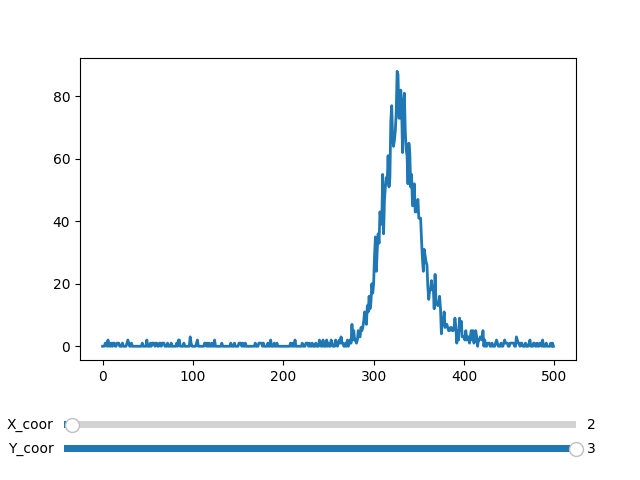

In [8]:
tls.hist_analyser(data)

In [9]:
data1 = np.array([np.load('1Dscanhist.npy')])

In [30]:
data2 = np.load('1Dscan.npy')

In [31]:
data2.shape

(133,)

In [33]:
data1.shape

(1, 133, 500)

e:\Virtual Environments\Projects\Time of Flight Imaging\Imaging\Tools.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider2 = Slider(ax_slider2, label='Y_coor', valmin=0, valmax=y_max, valstep=1, valinit=j)


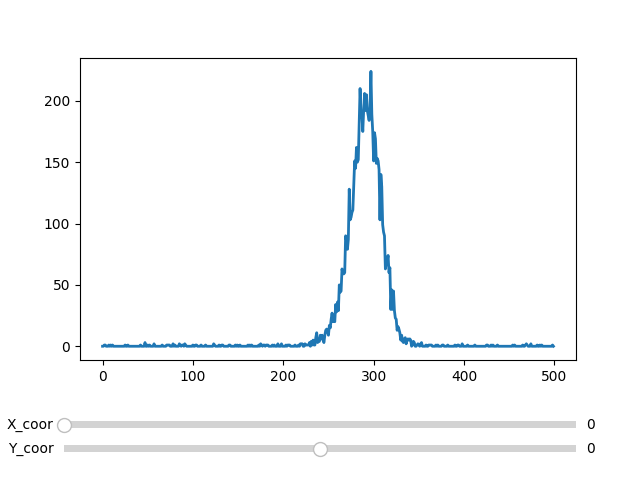

In [34]:
tls.hist_analyser(data1)

In [10]:
data2 = np.array([np.load('1Dscanhist.npy')])

e:\Virtual Environments\Projects\Time of Flight Imaging\Imaging\Tools.py:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  slider2 = Slider(ax_slider2, label='Y_coor', valmin=0, valmax=y_max, valstep=1, valinit=j)


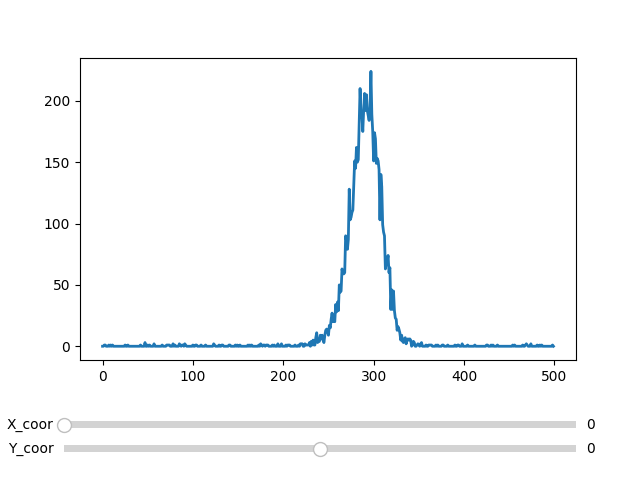

In [11]:
tls.hist_analyser(data2)

e:\Virtual Environments\Projects\Time of Flight Imaging\Imaging\Estimators.py:213: RuntimeWarning: overflow encountered in exp
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
e:\Virtual Environments\Projects\Time of Flight Imaging\Imaging\Estimators.py:213: RuntimeWarning: invalid value encountered in multiply
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \


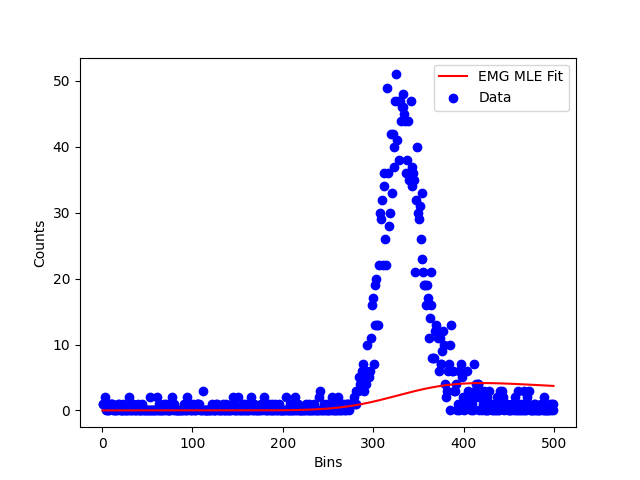

(330.740247199691, 50.70087593412333, 0.002004008016032064)

In [29]:
es.emg_mle_plot(data[0,-20])

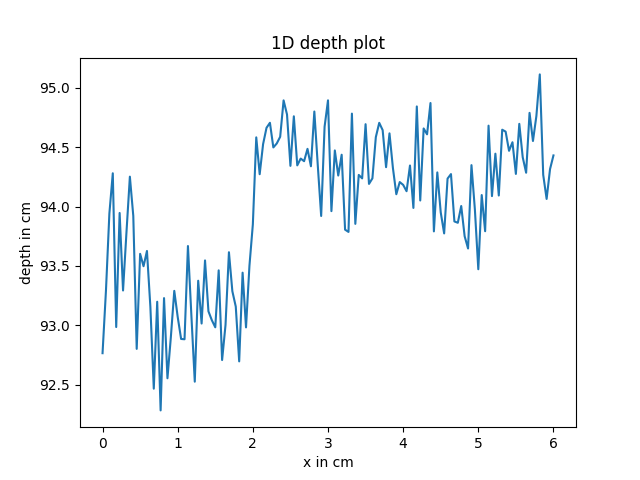

In [26]:
one_D_plot = tls.plot_1D(data[0], 10e-12, estimator=es.emg_fit_est)

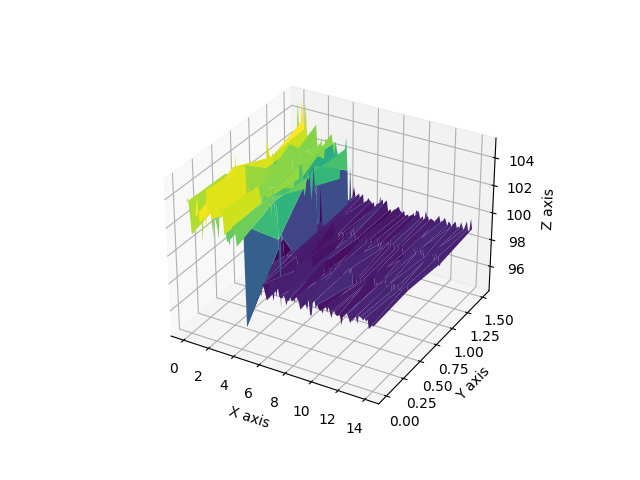

In [23]:
two_D_plot = tls.plot_2D(data, 10e-12, (14, 1.5))

In [12]:
import matplotlib.pyplot as plt

In [15]:
def reflectivity_map_2D(data):
    y_len, x_len, h_len = data.shape
    intensity_map = np.sum(data, axis=-1)
    max_intensity = np.max(intensity_map)
    reflectivity_map = intensity_map/max_intensity
    plt.figure()
    plt.imshow(reflectivity_map, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Intensity')  # Add a colorbar for reference
    plt.title("Grayscale Colormap")
    plt.show()

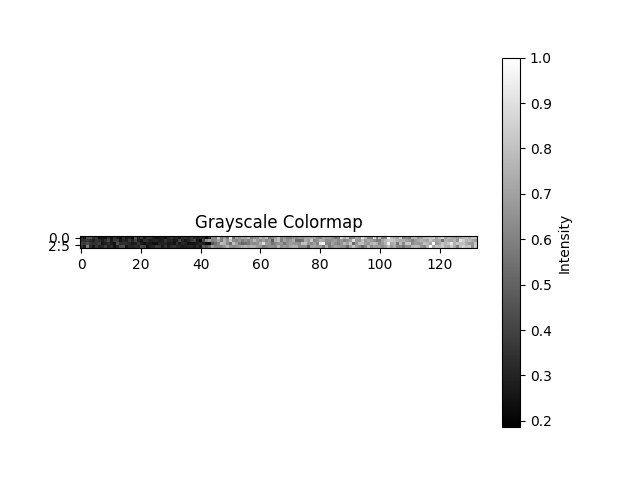

In [16]:
reflectivity_map_2D(data)

In [17]:
def reflectivity_log_map_2D(data):
    y_len, x_len, h_len = data.shape
    intensity_map = np.sum(data, axis=-1)
    max_intensity = np.max(intensity_map)
    # reflectivity_map = intensity_map/max_intensity
    reflectivity_map = np.log(intensity_map)
    plt.figure()
    plt.imshow(reflectivity_map, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Intensity')  # Add a colorbar for reference
    plt.title("Grayscale Colormap")
    plt.show()

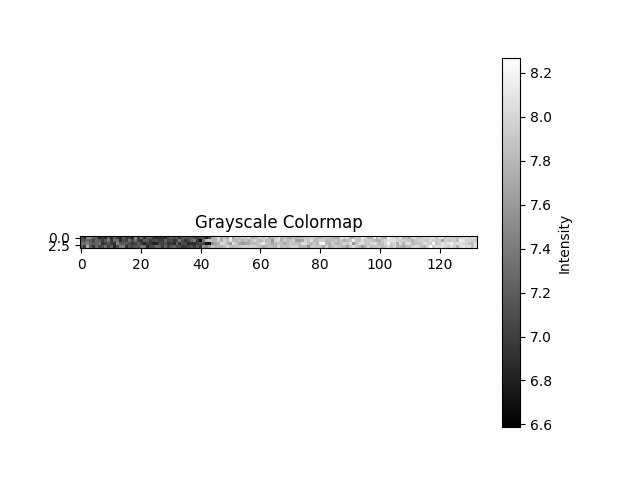

In [18]:
reflectivity_log_map_2D(data)

In [19]:
def reflectivity_exp_map_2D(data, beta=3):
    y_len, x_len, h_len = data.shape
    intensity_map = np.sum(data, axis=-1)
    max_intensity = np.max(intensity_map)
    reflectivity_map = np.exp(intensity_map*(beta/max_intensity))
    plt.figure()
    plt.imshow(reflectivity_map, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Intensity')  # Add a colorbar for reference
    plt.title("Grayscale Colormap")
    plt.show()

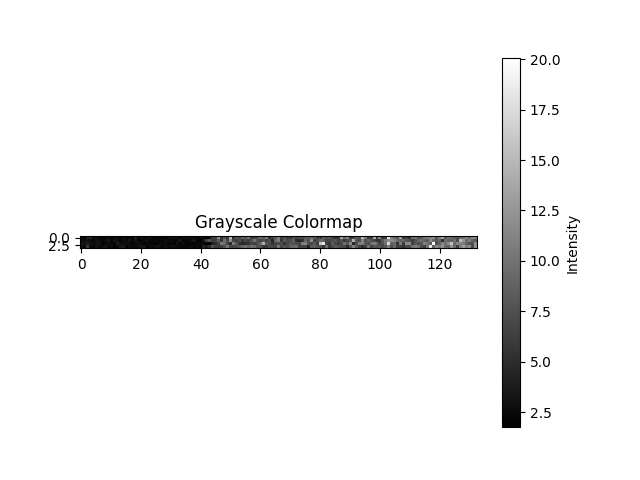

In [20]:
reflectivity_exp_map_2D(data)

In [ ]:
def mle_emg_fit(pdata):
    # Data setup
    nbins = pdata.shape[0]
    x = np.linspace(0.5, nbins - 0.5, nbins)
    y = pdata  # y-values from the data

    # Initial guesses for mean, std, and decay
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))
    decay_initial = 1 / (np.max(x) - np.min(x))
    initial_guess = [mean_weighted, std_weighted, decay_initial]

    # Perform MLE by minimizing the negative log-likelihood
    result = minimize(negative_log_likelihood_emg, initial_guess, args=(x, y), method="L-BFGS-B",
                    bounds=[(None, None), (1e-5, None), (1e-5, None)])  # Bounds to keep std and decay positive

    # Extract optimized parameters
    mean_mle, std_mle, decay_mle = result.x

    # Plot the fitted EMG and the data
    plt.plot(x, emg_pdf(x, mean_mle, std_mle, decay_mle) * np.sum(y), label="EMG MLE Fit", color="red")
    plt.scatter(x, pdata, label="Data", color="blue")
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

    # Return optimized parameters: mean, std, and decay
    return mean_mle, std_mle, decay_mle